# ML Домашнее задание №2 "Функции потерь и оптимизация"

Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

Реализовать самостоятельно логистическую регрессию

Обучить ее методом градиентного спуска

Методом nesterov momentum

Методом rmsprop

В качестве dataset’а взять Iris, оставив 2 класса:

Iris Versicolor

Iris Virginica

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Для удобства делаем из данных датафрейм:

In [9]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])

In [10]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Оставляем 2 класса: Iris Versicolor и Iris Virginica

In [11]:
iris_frame_1 = iris_frame[iris_frame.target != 0] 

In [12]:
iris_frame_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
iris_frame_1.target.replace(1, 0,inplace=True)
iris_frame_1.target.replace(2, 1,inplace=True)

C:\Users\Reb\anaconda3\lib\site-packages\pandas\core\series.py:4576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
iris_frame_1.rename({'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}, axis=1, inplace=True)

C:\Users\Reb\anaconda3\lib\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
iris_frame_1

,sepal_length,sepal_width,petal_length,petal_width,target,name
50,7.0,3.2,4.7,1.4,0,versicolor
51,6.4,3.2,4.5,1.5,0,versicolor
52,6.9,3.1,4.9,1.5,0,versicolor
53,5.5,2.3,4.0,1.3,0,versicolor
54,6.5,2.8,4.6,1.5,0,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = iris_frame_1['target']

In [18]:
iris_frame_1

,sepal_length,sepal_width,petal_length,petal_width,target,name
50,7.0,3.2,4.7,1.4,0,versicolor
51,6.4,3.2,4.5,1.5,0,versicolor
52,6.9,3.1,4.9,1.5,0,versicolor
53,5.5,2.3,4.0,1.3,0,versicolor
54,6.5,2.8,4.6,1.5,0,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1,virginica
146,6.3,2.5,5.0,1.9,1,virginica
147,6.5,3.0,5.2,2.0,1,virginica
148,6.2,3.4,5.4,2.3,1,virginica


In [19]:
X = iris_frame_1[['sepal_length','sepal_width', 'petal_length', 'petal_length']]

In [21]:
y = iris_frame_1['target']

In [22]:
lr = LogisticRegression()

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1000)

In [24]:
# обучаем модель на тренировочной выборке
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
# проверим качество модели 
lr.score(X_test, y_test)

0.9

In [26]:
lr.score(X_train, y_train)

0.95

In [28]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

## Градиентный спуск
Оптимизационный алгоритм для поиска локального минимума функции. Относится к методам первого порядка. Для поиска минимума делаем шаг в направлении, обратном градиенту функции.

Алгоритм:
1. Задаем $\gamma$ - "learning rate"
2. Выбираем начальное приближение $x_0$
3. for k = 0, 1, 2 ... do
    1. $s_k$ = -$\nabla f(x_k)$
    2. $x_{k+1} = x_k + \gamma s_k$

In [27]:
import numpy as np

In [32]:
y = iris_frame_1['target']
y1 = y.to_numpy()
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
a = 2
b = 25
sigma = 0.5

x = y1                      
y = a * x + b + sigma * np.random.randn(x.shape[0])

In [35]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

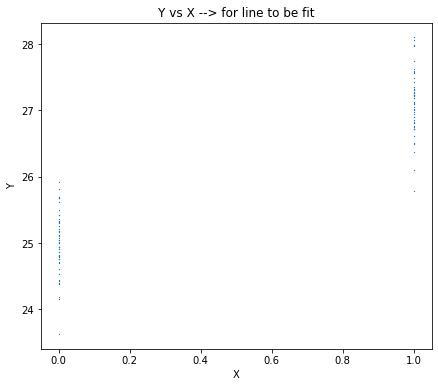

In [36]:
plt.figure(figsize = [7,6])
plt.scatter(x, y, marker='x', s=0.1)
plt.title('Y vs X --> for line to be fit')
plt.xlabel('X'); plt.ylabel('Y')

In [38]:
def compute_loss(a_est, b_est):
    return np.mean(np.square(y - (a_est * x + b_est)),2)

In [40]:
a_explore_range = 20
a_explore_step = 0.1

b_explore_range = 200
b_explore_step = 1


a_est_range = np.arange(a - a_explore_range, a + a_explore_range, a_explore_step)
b_est_range = np.arange(b - b_explore_range, b + b_explore_range, b_explore_step)

bgrid, agrid = np.meshgrid(b_est_range, a_est_range)

size_x = np.int(a_explore_range / a_explore_step * 2)
size_y = np.int(b_explore_range / b_explore_step * 2)
agrid_tiled = np.tile(np.reshape(agrid, [size_x, size_y, 1]), [1,1,x.shape[0]])
bgrid_tiled = np.tile(np.reshape(bgrid, [size_x, size_y,1]), [1,1,x.shape[0]])

loss_full_grid = compute_loss(agrid_tiled, bgrid_tiled)

Text(0.5, 0.92, 'loss function')

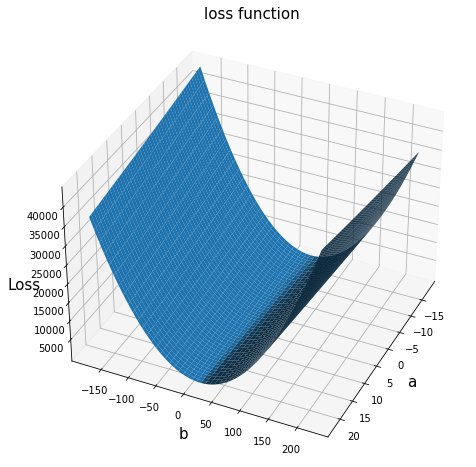

In [41]:
azimuth_angle = 25.
elevation_angle = 35

fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = elevation_angle, azim = azimuth_angle)
ax.plot_surface(agrid, bgrid, loss_full_grid)
ax.set_xlabel('a', fontsize=15);  ax.set_ylabel('b', fontsize=15)
ax.set_zlabel('Loss', fontsize=15)
ax.set_title('loss function', fontsize=15)

In [43]:
EPOCHS = 10
LEARNING_RATE = 0.0001
sigma = 0.25
X = y1
Y = 2*X + 5 + sigma * np.random.normal(scale=5, size=len(y1))


def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) ** 2
    return total_cost / (2 * len(X))


def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    


def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X)) 

In [44]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 = theta0 - LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.0004426478084654 t1: 1.0002456819598835 cost: 10.609951344078192
t0: 1.000885239068052 t1: 1.0004913295032787 cost: 10.607389214081728
t0: 1.0013277737861355 t1: 1.0007369426347337 cost: 10.60482775355731
t0: 1.0017702519700906 t1: 1.0009825213587962 cost: 10.602266962329738
t0: 1.0022126736272912 t1: 1.0012280656800132 cost: 10.599706840223844
t0: 1.0026550387651099 t1: 1.0014735756029314 cost: 10.597147387064513
t0: 1.0030973473909186 t1: 1.0017190511320966 cost: 10.59458860267667
t0: 1.0035395995120884 t1: 1.0019644922720539 cost: 10.592030486885278
t0: 1.003981795135989 t1: 1.0022098990273482 cost: 10.589473039515369
t0: 1.0044239342699894 t1: 1.0024552714025237 cost: 10.586916260392007


In [45]:
EPOCHS = 12
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
params = np.random.normal(size=(2,))

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)

    cost = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) / len(predictions)
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) / len(predictions)   

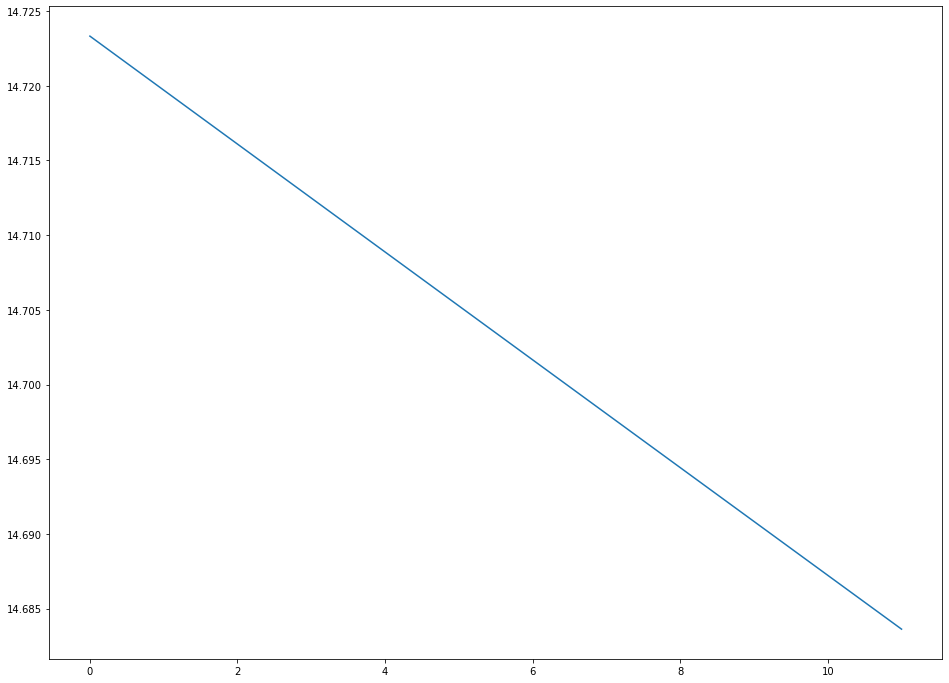

In [46]:
plt.figure(figsize=(16,12))
plt.plot(costs)
plt.show()

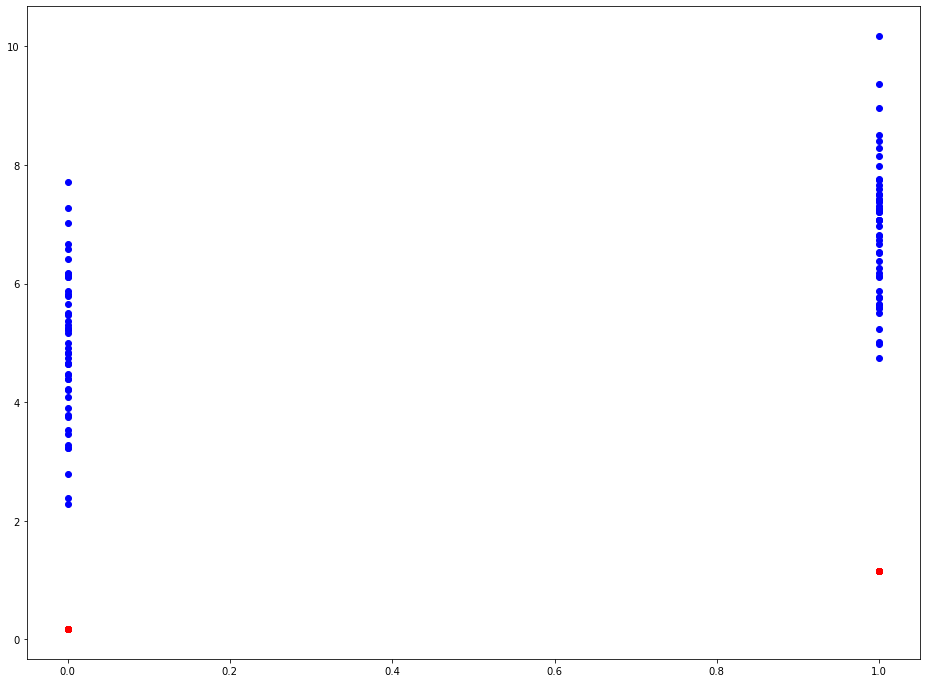

In [47]:
plt.figure(figsize=(16,12))
plt.scatter(X, Y, color='blue')
plt.scatter(X, preds[10], color='red')
plt.show()

In [49]:
def gradient(x, y, theta):
    a,b = theta[0], theta[1]
    temp_err = a * x + b - y
    loss = sum(temp_err * temp_err)
    grad_a = sum(x * temp_err)
    grad_b = sum(temp_err)
    return np.array([grad_a, grad_b]), loss


def plot_all_results(grad_store, abvalue_store, loss_store, velocity_store = None):
    plt.figure(figsize = [20, 12])
    plt.subplot(231)
    plt.plot(grad_store[:,0])
    plt.title('Gradient of loss wrt a'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial a}$')
    plt.subplot(232)
    plt.plot(grad_store[:,1])
    plt.title('Gradient of loss wrt b'); plt.xlabel("# Steps")
    plt.ylabel(r'$\frac{\partial loss}{\partial b}$')
    plt.subplot(233)
    plt.plot(abvalue_store[:,0])
    plt.title('"a" values'); plt.xlabel("# Steps")
    plt.ylabel('a')
    plt.subplot(234)
    plt.plot(
        abvalue_store[:,1])
    plt.title('"b" values'); plt.xlabel("# Steps")
    plt.ylabel('b')
    plt.subplot(235)
    plt.plot(loss_store)
    plt.title("Loss"); plt.xlabel("# Steps")
    plt.ylabel('loss')
    if velocity_store is not None:
        plt.subplot(236)
        plt.plot(velocity_store[:, 0])
        plt.plot(velocity_store[:, 1], 'r*')
        plt.legend(['Velocity of grad_a', 'Velocity of grad_b'])

def init_data_store(num_epochs):
    grad_store = np.zeros([num_epochs, 2], dtype=float)
    abvalue_store = np.zeros([num_epochs, 2], dtype=float)
    loss_store = np.zeros([num_epochs, 1], dtype=float)
    velocity_store = np.zeros([num_epochs, 2], dtype=float)
    
    return grad_store, abvalue_store, loss_store, velocity_store

ix = np.arange(0,x.shape[0])
np.random.shuffle(ix)
x = x[ix]
y = y[ix]

def get_data_from_batch(x,y,idx,batch_size):
    start_ix = idx*batch_size
    end_ix   = min(start_ix + batch_size, x.shape[0])
    return (x[start_ix:end_ix], y[start_ix:end_ix])

In [ ]:
initial_a = 8
initial_b = 75
num_epochs = 100
eta = 5e-5
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(x.shape[0]/batch_size)
gamma = 0.9

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
velocity = np.array([0, 0])

i=0
for epoch in range(num_epochs):   
    for batch_idx in range(n_batches):
        abvalue_store[i] = theta
        velocity_store[i] = velocity
        
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        
        # computing gradient at lookahead theta
        look_ahead_theta = theta - gamma*velocity
        grad, loss = gradient(x_batch, y_batch, look_ahead_theta)
        
        # update the params
        velocity = gamma* velocity + eta * grad
        theta = theta - velocity
        
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store, velocity_store)

## Метод Нестерова

In [51]:
def nesterov_accelarated_gradient(c_f, f):
    print("f(x) = ",c_f)
    f_dash = diff(c_f,x)
    print ("df(x)/dx = " , f_dash)
    a = float(input("Введите начальное значение: "))
    x0=a
    n = float(input("Введите скорость обучения: "))
    g = float(input("Введите константу: "))
    err = float(input("Введите допуск ошибки: "))
    print ("Начальный градиент Нестерова")
    print ("x0 = ",a)
    print ("f(x0) = ",f(a))
    iter_count = 0
    xk=x0
    v0=0
    while (True):
        iter_count = iter_count + 1
        #print "Iteration No. ", iter_count, ": "
        fk_dash= (lambdify(x , f_dash , "numpy"))(xk - g*v0)
        vk = g*v0 + n*fk_dash
        xk = xk - vk
        #print "x"+str(iter_count)+" = ",xk
        #print "f(x"+str(iter_count)+") = ",f(xk)
        if abs(N(xk-x0)) < float(err):
            break
        x0 = xk
        v0 = vk
    print ("Количество итераций = ",iter_count)
    print ("Минимальное = ",xk)
    print ("Минимальное значение функции= ",f(xk))

In [52]:
from sympy import *
x = Symbol('x')
cost_function = np.sum(np.square(predictions - Y)) / (2 * len(predictions))
c_f=sympify(cost_function)
f = lambdify(x, c_f, "numpy")

In [54]:
nesterov_accelarated_gradient(c_f, f)

f(x) =  14.6836288900518
df(x)/dx =  0
Введите начальное значение: 8
Введите скорость обучения: 0.02
Введите константу: 3
Введите допуск ошибки: 1
Начальный градиент Нестерова
x0 =  8.0
f(x0) =  14.6836288900518
Количество итераций =  1
Минимальное =  8.0
Минимальное значение функции=  14.6836288900518


## Метод rmsprop

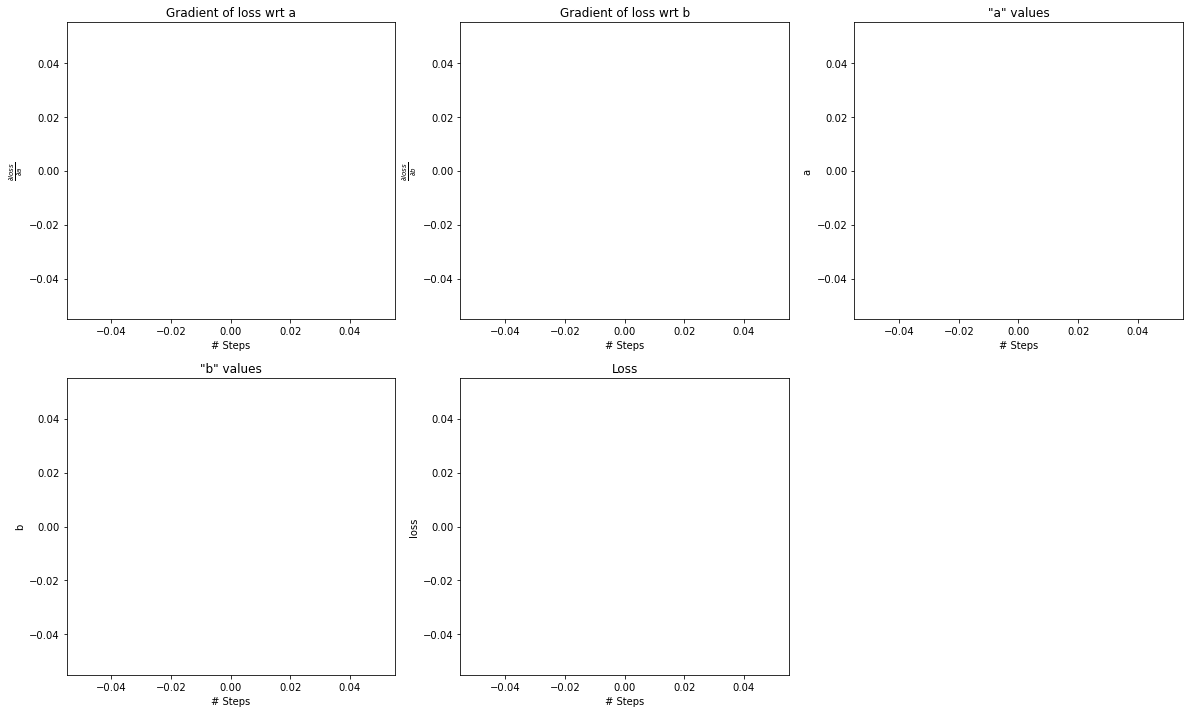

In [57]:
initial_b = 75
num_epochs = 500
eta = 8e-2
batch_size = 150 # Lower this and watch the plots grow messy
n_batches = int(X.shape[0]/batch_size)
eps = 1e-8
gamma = 0.999

grad_store, abvalue_store, loss_store, velocity_store = init_data_store(num_epochs*n_batches)

theta = np.array([initial_a, initial_b])
i=0
expected_grad = np.array([0,0])
for epoch in range(num_epochs):   
    
    for batch_idx in range(n_batches):
        
        abvalue_store[i] = theta
        
        # get the data and compute gradient 
        x_batch, y_batch = get_data_from_batch(x,y, batch_idx, batch_size)
        grad, loss = gradient(x_batch, y_batch, theta)
        
        # compute update rule
        expected_grad = gamma * expected_grad + (1 - gamma) * np.square(grad)
        RMS_grad = np.sqrt(expected_grad + eps)
        delta_theta = -(eta/RMS_grad) * grad
        
        theta = theta + delta_theta
        grad_store[i] = grad
        loss_store[i] = loss
        i += 1
    
plot_all_results(grad_store, abvalue_store, loss_store)